In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset_train = pd.read_csv('/content/drive/MyDrive/Yahoo_Finance.csv')

In [ ]:
training_set1=dataset_train[0:1258]
testing_set1=dataset_train[1258:]

In [ ]:
training_set = training_set1.iloc[:, 4:5].values
testing_set = testing_set1.iloc[:, 4:5].values

In [ ]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.        ],
       [0.03224044],
       [0.01202186],
       ...,
       [0.73114754],
       [0.83442623],
       [0.81693989]])

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from tensorflow.python.framework import ops
ops.reset_default_graph()

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 95ms/step - loss: 0.1133
Epoch 2/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0112
Epoch 3/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0076
Epoch 4/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0083
Epoch 5/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0075
Epoch 6/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0068
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0065
Epoch 8/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0070
Epoch 9/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0075
Epoch 10/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0055
Epoch 11/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0062
Epoch 12/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0061
Epoch 13/100
38

In [ ]:
dataset_test = testing_set1
real_stock_price = dataset_test.iloc[:, 4:5].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(61, 563):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

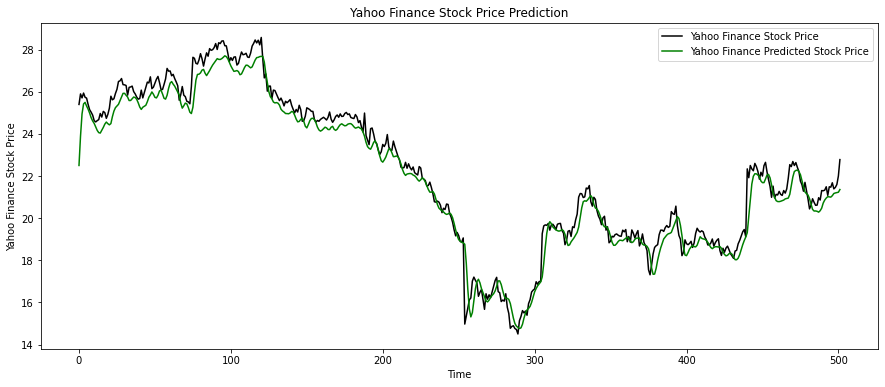

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

plt.plot(real_stock_price, color = 'black', label = 'Yahoo Finance Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Yahoo Finance Predicted Stock Price')
plt.title('Yahoo Finance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Yahoo Finance Stock Price')
plt.legend()
plt.show()